<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"  style="height:65%" align="right">


# Lista 2 - NN & Backpropagation
**Nome:**

**Numero Usp:**


_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [639]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.python.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_notebook
%matplotlib inline
tf.__version__

'2.3.0'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simpes possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo perceptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [640]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [641]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)


100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [642]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="sgd", loss="mean_squared_error")
# model.fit(xs,ys,epochs=300)

In [643]:
model.summary()

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_326 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [644]:
print("prediction: "+ str(model.predict([17]))+"      real value: " + str(f1(17)))

prediction: [[-7.544176]]      real value: 175


In [645]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 [==============================] - 0s 554us/step - loss: 4212.2568


4212.2568359375

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE). 

## Aprendendo uma função não linear

In [646]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [647]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

In [648]:
# A rede foi definida abaixo como uma função para poder testar várias funçcões de ativação
# A saída unitária não deve ter função de ativação pq não iremos normalizar os dados de saída.

In [649]:
def job(activation,optimizer,loss):
        #create model
        model = tf.keras.Sequential([    
            keras.Input(shape=(1,)),
            keras.layers.Dense(units=32,activation=activation),
            keras.layers.Dense(units=128,activation=activation),
            keras.layers.Dense(units=8,activation=activation),
            keras.layers.Dense(units=1),
        ])

        #compile model
        model.compile(optimizer=optimizer, loss=loss)     

        #fit model
        history = model.fit(x,y,epochs=400,verbose=0)

        # list all data in history
        #    print(history.history.keys())
        
        #summary = model.summary()
        x_val = np.linspace(-10,0,63)
        y_val = f2(x_val)
        x_val_tensor =  tf.convert_to_tensor(x_val)
        loss = model.evaluate(x=x_val_tensor,y=y_val)
        
        #calculate extrapolations
        fx_= np.array([])
        pred_ =  np.array([])
        for i in range(-100,100):
            pred = model.predict([i])[0][0]
            f= f2(i)
            fx_ = np.insert(fx_,len(fx_),f)
            pred_ = np.insert(pred_,len(pred_),pred)
        er = (f-pred)/f*100
        
        return history, loss, fx_, pred_
        

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbolica



In [650]:
# Para a rede en questão utilizando 3 funções de ativação os resultados foram muito semelhantes. Vide o loss abaixo e os gráficos de prediction logo a seguir.
# Somente a sigmoid precisa de mais tempo para convergir para um bom resultado de loss. Neste experimenti a tanh não tem comportamento diferente das outras.

2/2 [==============================] - 0s 573us/step - loss: 0.2261
loss_relu: 0.005213789641857147
loss_sigmoid: 0.06092020869255066
loss_tanh:0.2261052280664444


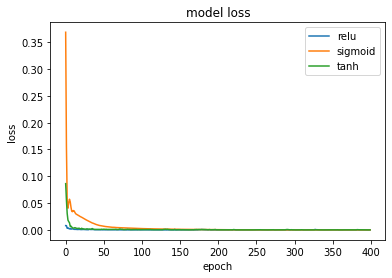

In [651]:
#execute jobs with different activate functions
history_relu, loss_relu, fx_relu, pred_relu=job("relu","adam","mean_squared_error")
history_sigmoid, loss_sigmoid, fx_sigmoid, pred_sigmoid=job("sigmoid","adam","mean_squared_error")
history_tanh, loss_tanh, fx_tanh, pred_tanh=job("tanh","adam","mean_squared_error")
print("loss_relu: " + str(loss_relu))
print("loss_sigmoid: " + str(loss_sigmoid))
print("loss_tanh:" + str(loss_tanh))

# plot history for losses
line, = plt.plot(history_relu.history['loss'], label='relu')
plt.legend()
line, = plt.plot(history_sigmoid.history['loss'], label= 'sigmoid')
plt.legend()
line, = plt.plot(history_tanh.history['loss'], label= 'tanh')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.rcParams["figure.figsize"] = (15,20)
plt.show()

O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop

2/2 [==============================] - 0s 636us/step - loss: 0.0253


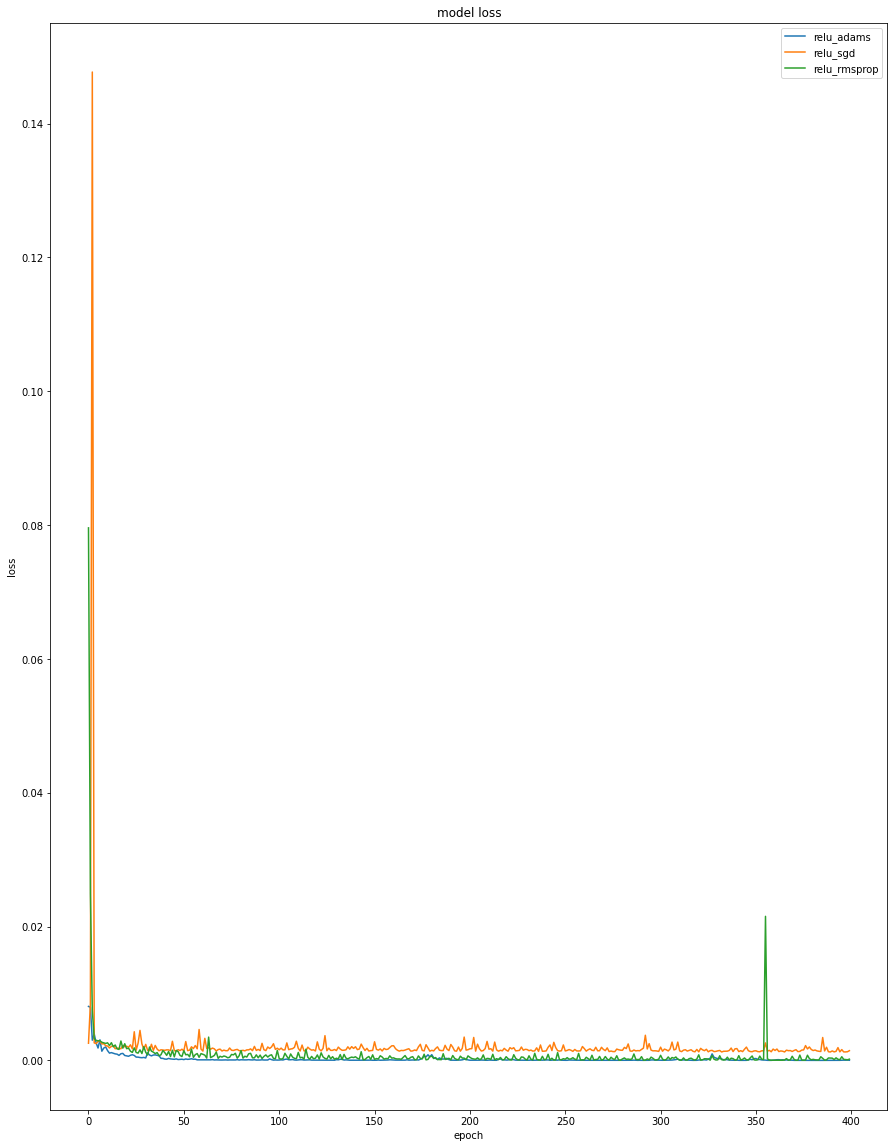

In [652]:
# plot history for different optimizers
history_sgd, loss_sgd, fx_sgd, pred_sgd=job("relu","sgd","mean_squared_error")
history_rmsprop, loss_rmsprop, fx_rmsprop, pred_rmsprop=job("relu","rmsprop","mean_squared_error")
line, = plt.plot(history_relu.history['loss'], label='relu_adams')
plt.legend()
line, = plt.plot(history_sgd.history['loss'], label= 'relu_sgd')
plt.legend()
line, = plt.plot(history_rmsprop.history['loss'], label= 'relu_rmsprop')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.rcParams["figure.figsize"] = (15,20)
plt.show()

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?




**<font color='red'> Sua resposta aqui </font>**

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

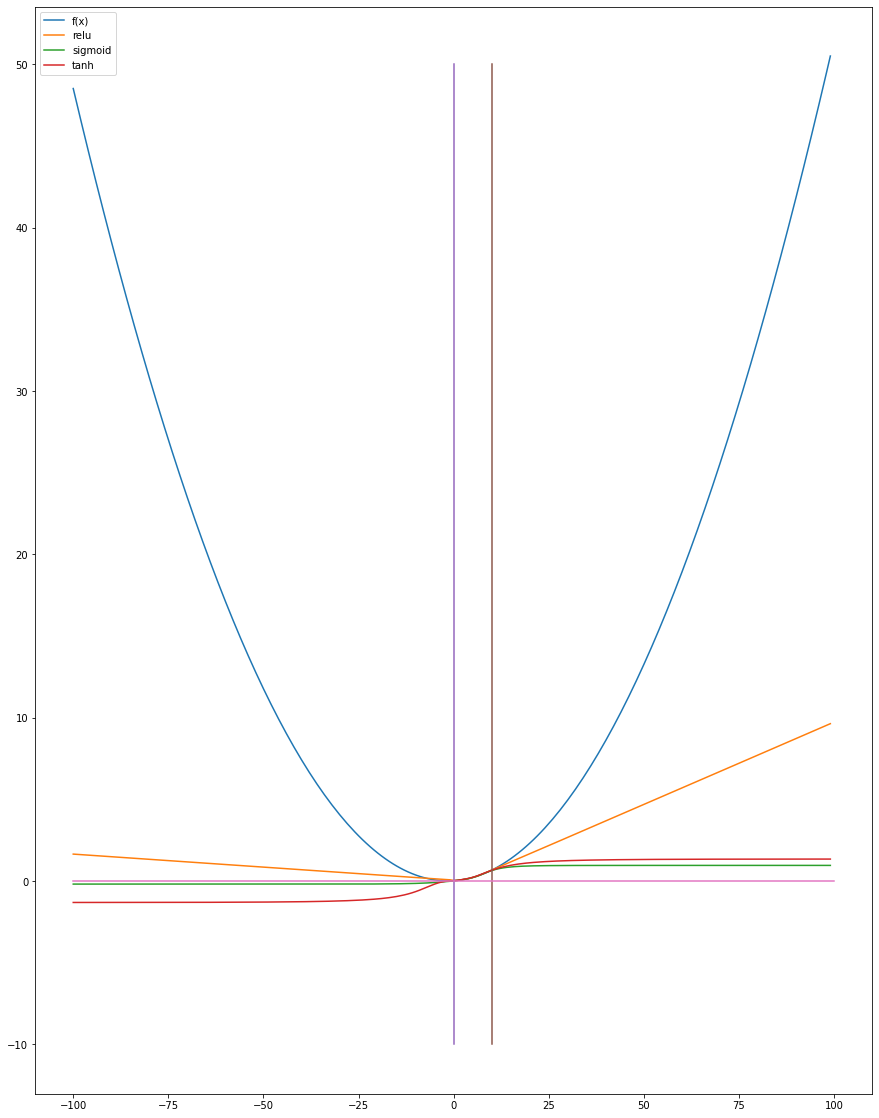

In [653]:
# Fora do intervalo de treino as performances das três funções de ativação são péssimas.
# Vide o gráfico abaixo (as duas barras verticais simbolizam o intervalo [0;10])
line, = plt.plot(range(-100,100),fx_relu, label='f(x)')
plt.legend()
line, = plt.plot(range(-100,100),pred_relu,label='relu')
plt.legend()
line, = plt.plot(range(-100,100),pred_sigmoid,label='sigmoid')
plt.legend()
line, = plt.plot(range(-100,100),pred_tanh,label='tanh')
plt.legend()
plt.rcParams["figure.figsize"] = (15,20)
x_coordinates = [0, 0]
y_coordinates = [-10, 50]
plt.plot(x_coordinates, y_coordinates)
x_coordinates = [10, 10]
y_coordinates = [-10, 50]
plt.plot(x_coordinates, y_coordinates)
x_coordinates = [-100, 100]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates)
plt.show()


**<font color='red'> Sua resposta aqui </font>**

# Prevendo se vai chover na Austrália

## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisara escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

In [654]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features e salva em disco"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly
    plt.figure(figsize=(8, 6))

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.savefig('data_RainToday.png')
    plt.clf()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.savefig('data_Rainomorrow.png')
    plt.clf()

    # Humidity3pm:
    sns.set()
    sns.distplot(data.Humidity3pm, color=ibm_pltt[0])
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.savefig('data_Humidity3pm.png')
    plt.clf()

    # Pressure9am:
    sns.set()
    sns.distplot(data.Pressure9am, color=ibm_pltt[4])
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.savefig('data_Pressure9am.png')
    plt.clf()

    # Rainfall:
    sns.set()
    sns.distplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.savefig('data_Rainfall.png')
    plt.clf()

    return


# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [655]:
def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    #Seu código aqui

    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    #Seu código aqui
    

    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    #Seu código aqui
    
   
    return x_train, x_val, y_train, y_val


In [656]:
df = load_data()
visualize_data(df)
df = pre_processing(df)
x_train, x_val, y_train, y_val = split_data(df,)

NameError: name 'raw_data' is not defined

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


# Seu código aqui